In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from subprocess import check_output
print(check_output(["ls", "."]).decode("utf-8"))

SimpsonsPopularity.ipynb
simpsons_characters.csv
simpsons_episodes.csv
simpsons_locations.csv
simpsons_script_lines.csv.zip



In [2]:
episodes = pd.read_csv('simpsons_episodes.csv')
episodes.head()

,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating,imdb_votes,image_url,video_url
0,10,Homer's Night Out,1990-03-25,7G10,1,10,10,30.3,50816.0,7.4,1511.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/275197507879
1,12,Krusty Gets Busted,1990-04-29,7G12,1,12,12,30.4,62561.0,8.3,1716.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/288019523914
2,14,"Bart Gets an ""F""",1990-10-11,7F03,2,1,14,33.6,59575.0,8.2,1638.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260539459671
3,17,Two Cars in Every Garage and Three Eyes on Eve...,1990-11-01,7F01,2,4,17,26.1,64959.0,8.1,1457.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260537411822
4,19,Dead Putting Society,1990-11-15,7F08,2,6,19,25.4,50691.0,8.0,1366.0,http://static-media.fxx.com/img/FX_Networks_-_...,http://www.simpsonsworld.com/video/260539459670


In [3]:
print('Data shape befor: {}'.format(episodes.shape))
episodes.drop(['image_url', 'video_url'], axis = 1, inplace = True)

Data shape befor: (600, 13)


In [4]:
print('Data shape after: {}'.format(episodes.shape))

Data shape after: (600, 11)


In [5]:
episodes.season.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [6]:
episodes.isnull().sum()

id                        0
title                     0
original_air_date         0
production_code           0
season                    0
number_in_season          0
number_in_series          0
us_viewers_in_millions    6
views                     4
imdb_rating               3
imdb_votes                3
dtype: int64

In [7]:
episodes.dropna(inplace=True)


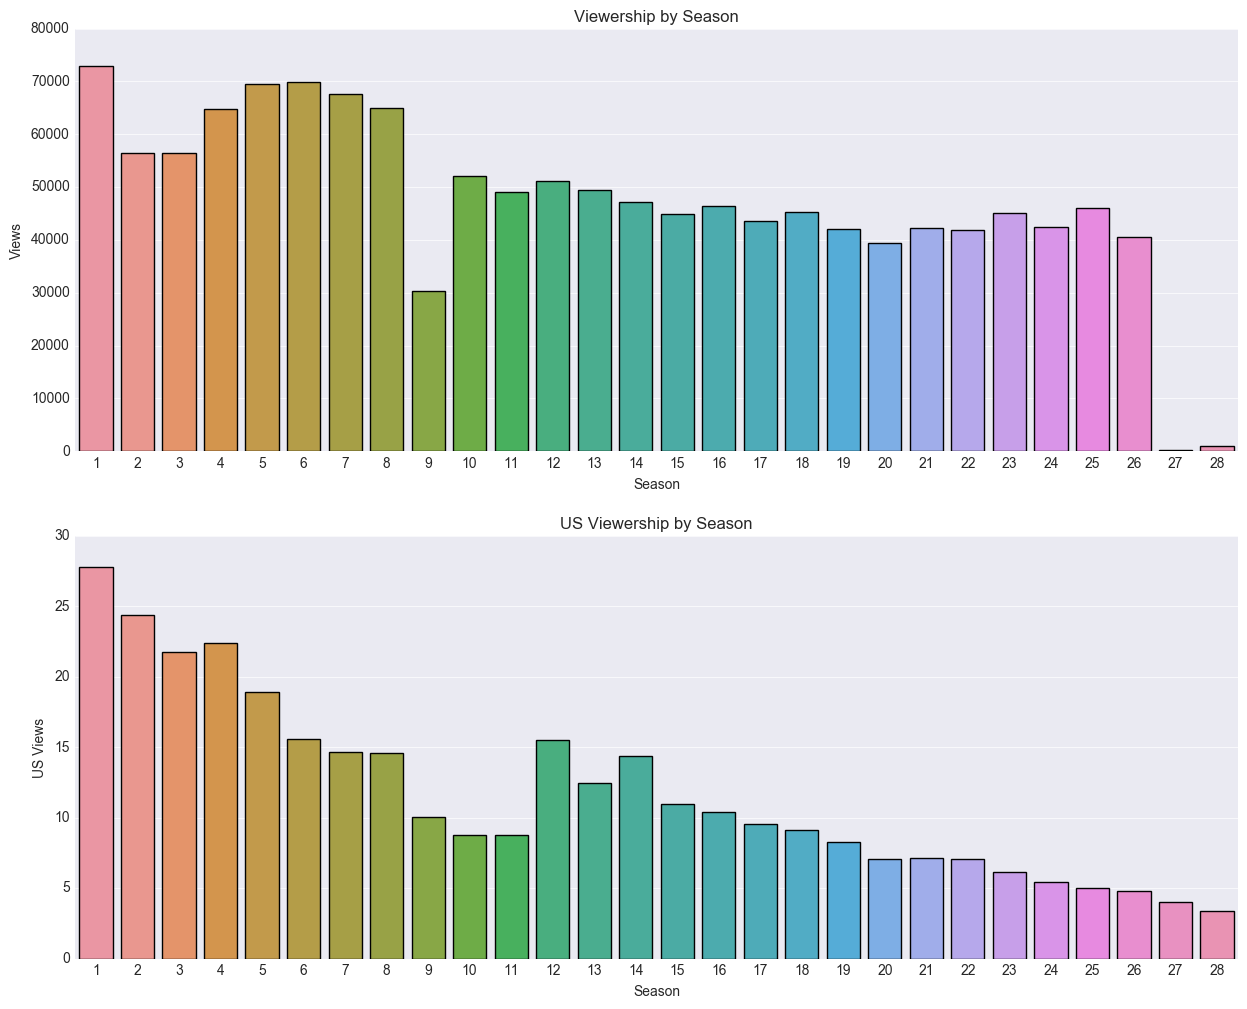

In [8]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize = (15, 12))
axis1.set_title('Viewership by Season')
axis2.set_title('US Viewership by Season')
sns.barplot(x='season', y='views', data=episodes, ci=None, ax=axis1)
sns.barplot(x='season', y='us_viewers_in_millions', data=episodes, ci=None, ax=axis2)
axis1.set_xlabel('Season')
axis2.set_xlabel('Season')
axis1.set_ylabel('Views')
axis2.set_ylabel('US Views')

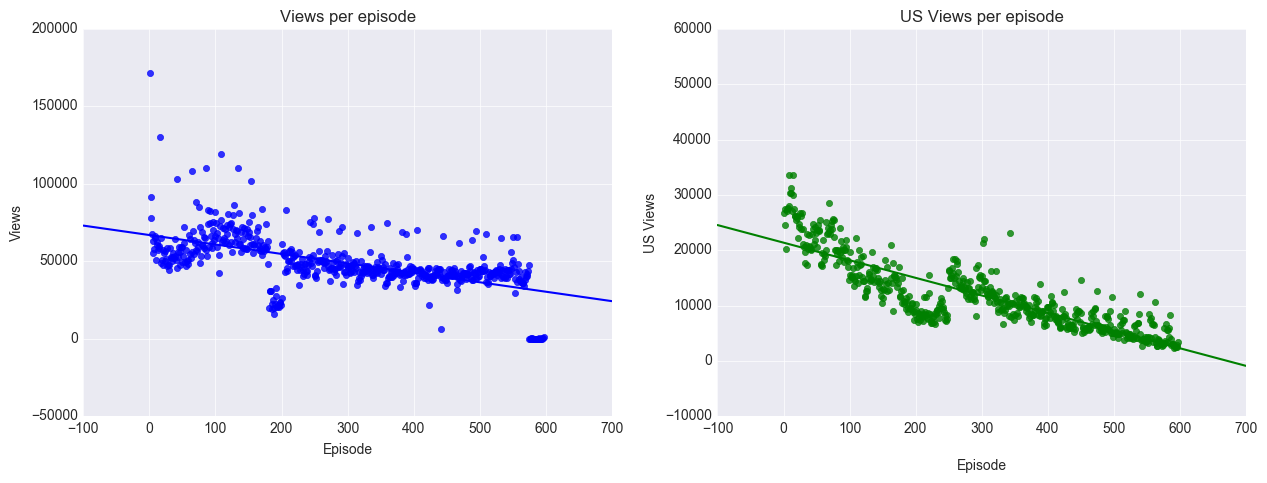

In [9]:
episodes['us_viewers'] = episodes['us_viewers_in_millions'] * 1000

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 5))
axis1.set_title('Views per episode')
axis2.set_title('US Views per episode')

sns.regplot(x='id', y='views', data=episodes, ci=None, ax=axis1)
sns.regplot(x='id', y='us_viewers', data=episodes, ci=None, ax=axis2)
episodes.drop('us_viewers', axis=1, inplace=True)
axis1.set_xlabel('Episode')
axis2.set_xlabel('\nEpisode')
axis1.set_ylabel('Views')
axis2.set_ylabel('US Views')

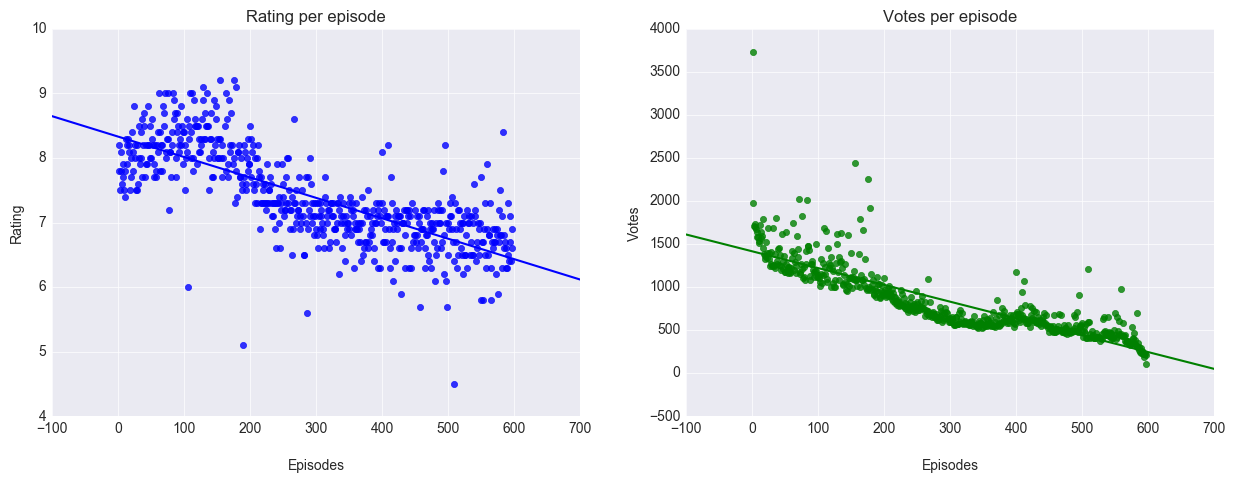

In [10]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (15, 5))
axis1.set_title('Rating per episode')
axis2.set_title('Votes per episode')
sns.regplot(x='id', y='imdb_rating', data=episodes, ci=None, ax=axis1)
sns.regplot(x='id', y='imdb_votes', data=episodes, ci=None, ax=axis2)
axis1.set_xlabel('\nEpisodes')
axis2.set_xlabel('\nEpisodes')
axis1.set_ylabel('Rating')
axis2.set_ylabel('Votes')